<a href="https://colab.research.google.com/github/AndresNamm/StatisticsColab/blob/main/StatisticalRethinkingExample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we simulate experiment with 4 sided globe drawing in total N examples. Our aim is to estimate p. The probability of drawing water. It is a very simplified world and our example follows it to the fullest


- [Slides](https://speakerdeck.com/rmcelreath/statistical-rethinking-2023-lecture-02?slide=46)

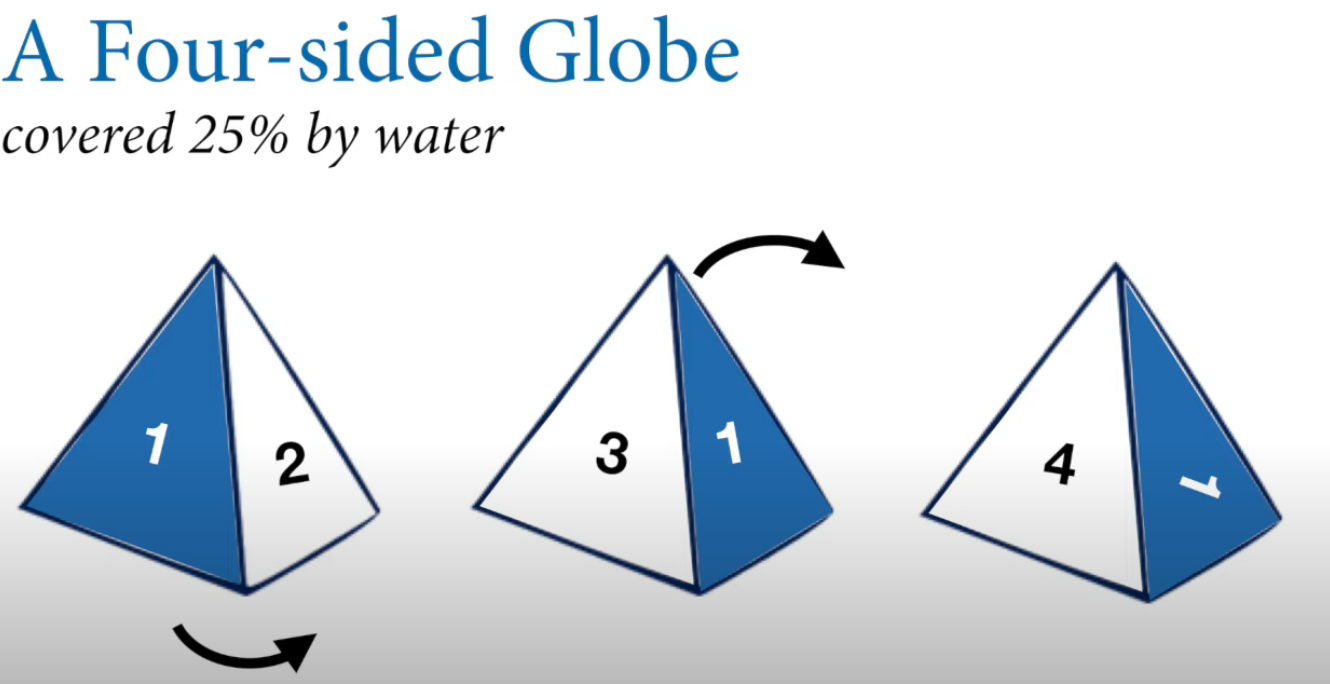

In [1]:
import numpy as np

def simulate(draws=30, sides_with_water=2):
  """Generate a NumPy array with random binary draws based on a probability.

  Returns:
    A NumPy array of binary values (0 or 1).
  """
  if sides_with_water > 4:
    raise ValueError("The number of sides with water cannot exceed 4.")
  if sides_with_water < 0:
    raise ValueError("The number of sides with water cannot be negative.")
  p_water = sides_with_water / 4
  return np.random.choice([0, 1], size=draws, p=[1 - p_water, p_water])


# Example usage:
simulated_data = simulate()
simulated_data


array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0])

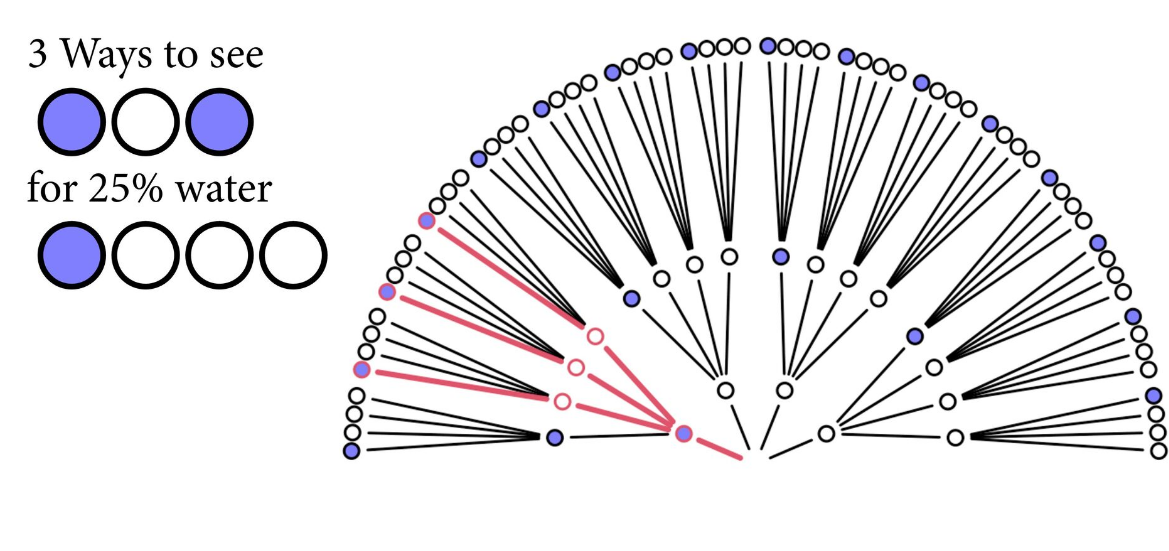

In [8]:
def estimator(water_samples:int, land_samples:int):
  ''' Returns the probability of each probability of water based on observation
  '''
  # Each possible water probability
  probabilities = [0.0,1/4,2/4,3/4,1]
  total_observations = water_samples + land_samples
  ways = {}
  all_ways = 0
  for p_water in probabilities:
    ways[p_water] = 4*p_water**water_samples * (4-4*p_water)**land_samples
    all_ways+=ways[p_water]

  for k,v in ways.items():
    ways[k] = v/all_ways
  return ways




In [7]:

for i in range(1,5):
    print(f"Simulating {i} sides with water")
    estimates = {}
    for j in range(3):
        sample= simulate(30,i)
        water_count = sample.sum()
        sample.size - sample.sum()
        land_count = sample.size - water_count
        res = estimator(water_count, land_count)
        for k,v in res.items():
            if k not in estimates:
                estimates[k] = []
            estimates[k].append(float(round(v,2)))
    print(estimates)

Simulating 1 sides with water
{0.0: [0.0, 0.0, 0.0], 0.25: [1.0, 0.76, 0.99], 0.5: [0.0, 0.24, 0.01], 0.75: [0.0, 0.0, 0.0], 1: [0.0, 0.0, 0.0]}
Simulating 2 sides with water
{0.0: [0.0, 0.0, 0.0], 0.25: [0.0, 0.04, 0.01], 0.5: [0.89, 0.96, 0.97], 0.75: [0.11, 0.0, 0.01], 1: [0.0, 0.0, 0.0]}
Simulating 3 sides with water
{0.0: [0.0, 0.0, 0.0], 0.25: [0.0, 0.0, 0.0], 0.5: [0.01, 0.0, 0.0], 0.75: [0.99, 1.0, 1.0], 1: [0.0, 0.0, 0.0]}
Simulating 4 sides with water
{0.0: [0.0, 0.0, 0.0], 0.25: [0.0, 0.0, 0.0], 0.5: [0.0, 0.0, 0.0], 0.75: [0.0, 0.0, 0.0], 1: [1.0, 1.0, 1.0]}
